<a href="https://colab.research.google.com/github/lilianabs/learn-tensorflow/blob/main/binary_classification_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_images)

60000

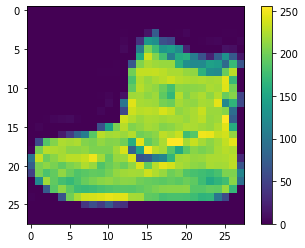

In [6]:
# Inspect the first image

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

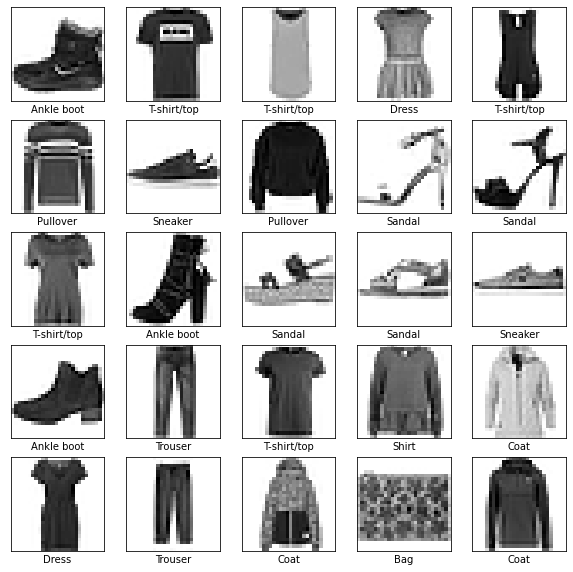

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)                           
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy']
)

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4972 - Accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3751 - Accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3367 - Accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3126 - Accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2954 - Accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - Accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2687 - Accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2568 - Accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2486 - Accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy: ', test_acc)

313/313 - 1s - loss: 0.3330 - Accuracy: 0.8862 - 683ms/epoch - 2ms/step
Test accuracy:  0.8862000107765198


In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

In [17]:
predictions[0]

array([2.4094406e-09, 2.6742419e-12, 3.0093389e-10, 1.5590008e-11,
       5.7105093e-12, 6.1372258e-03, 1.5957116e-07, 4.9022739e-03,
       2.7647163e-06, 9.8895770e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

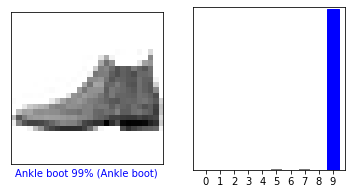

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


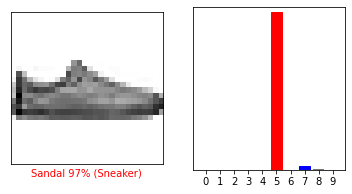

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

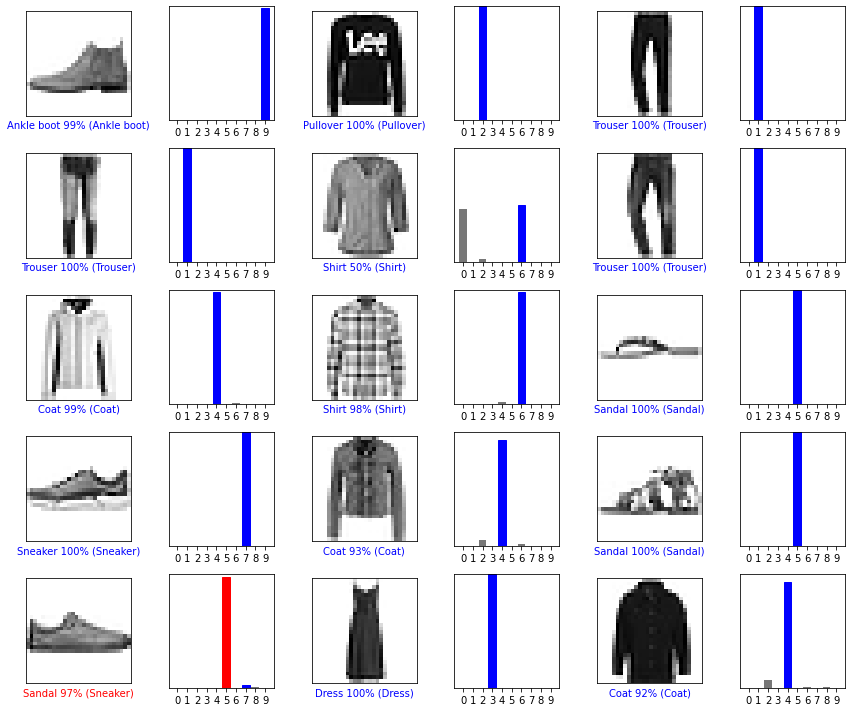

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()